<IPython.core.display.Javascript object>


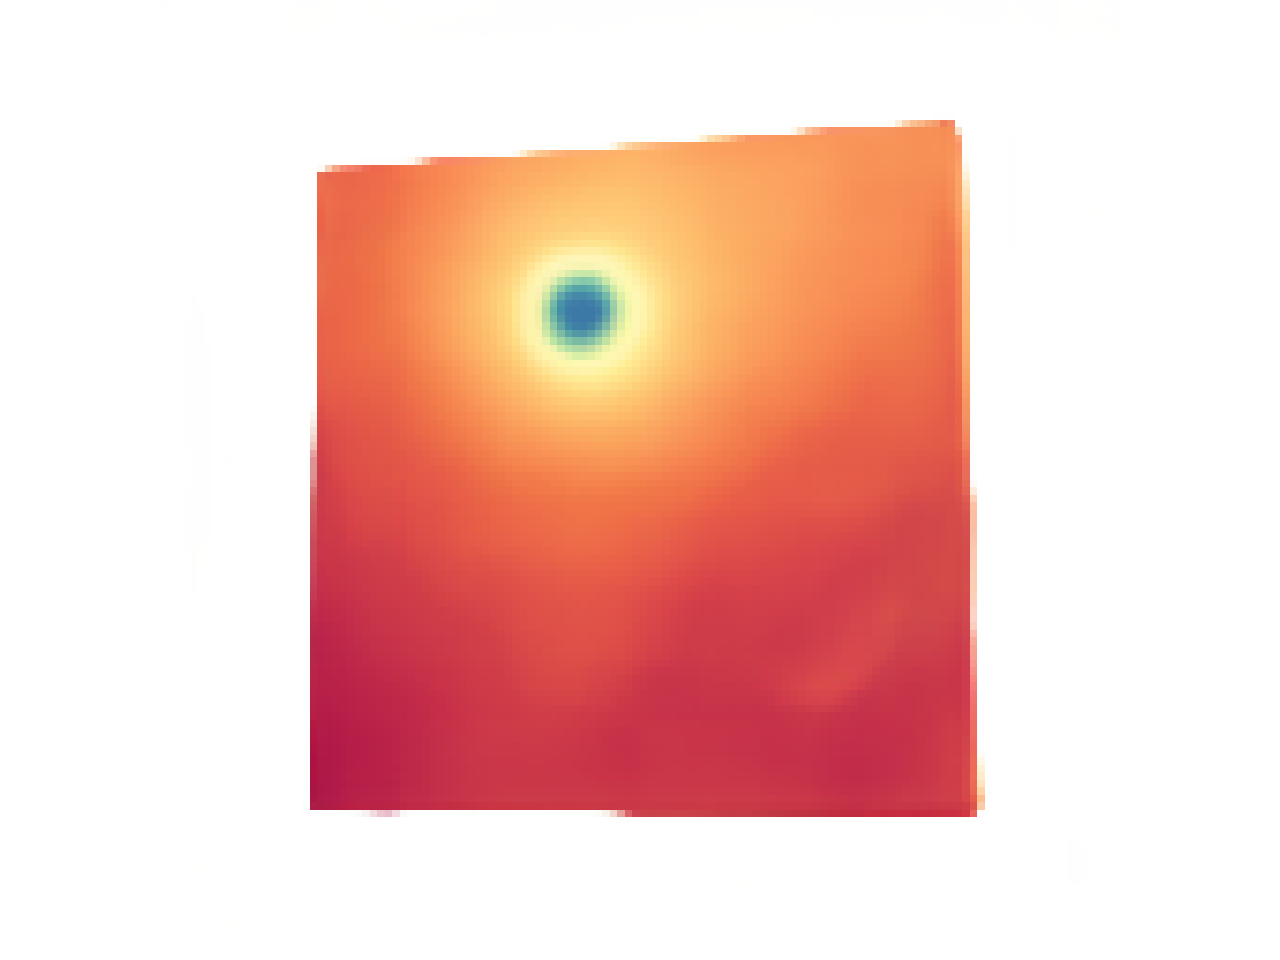

In [1]:
%matplotlib notebook
import pycinema

## You will need to install PyTorch to be able to run this example.
## Please use this link to install Pytorch: https://pytorch.org/get-started/locally/
## Or you can try: pip3 install torch torchvision

#############################
## This example demonstrates how we can use CNN-based ML model trained on a time varying data with 
## phi, theta, and time steps as input parameters. some time steps are skipped during training
## After training, any timestep within the trained time window can be used as input 
## to generate image-based visualizations along with any phi and theta values for unknown input parameters
## trained phi range: -90 to 90, theta range: 0 to 360, time window: 1 to 20.
## We trained the model using time steps: 1,3,5,7,...19 with 1000 images from each time step with random 
## ohi and theta values. Now we can query any value of phi, theta and time within the above ranges.
#############################

## Create the instance of the filter
mlfilter = pycinema.ImageGeneratorCNN()

## Set input params same as was used during training
######################################

## Input trained model file
mlfilter.inputs.Model.set('../data/MLModels/Model_MLImageGenerator_Isabel_timevarying_2000.pth',False)
mlfilter.inputs.Device.set('cpu',False)
## Phi,Theta, Timestep value for which the image will be generated
mlfilter.inputs.Params.set([[-10,5.0,3]],False)
## number of input parameter in training set, in this case, 2 (phi and theta)
mlfilter.inputs.VP.set(3,False)
## Internal parameter for CNN, should be the same as was used during training
mlfilter.inputs.VPO.set(256,False)
## Internal parameter for CNN, should be the same as was used during training
mlfilter.inputs.Channel.set(8,False)
mlfilter.update()

# Display Results
image_viewer = pycinema.ImageViewer()
image_viewer.inputs.images.set( mlfilter.outputs.Images )